Visualizer for simulated dynamic adaptive networks

Access: datafiles with adj matrices+culture vecs

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import analysis as analysis
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#df = analysis.read_pickle('df_sayama_change_all')
df = analysis.read_pickle('df_Sayama')
df.head()

,degrees,clusterCoeff,reciprocity,giantComponent,diam,SPL,CD,std_d,std_rs,std_rw,tags
0,"[23, 22, 21, 20, 20, 19, 19, 18, 18, 18, 17, 1...",0.261858,0.246575,1.0,4,2.44163,2.853668,0.0,0.0,0.0,0
1,"[22, 22, 20, 19, 19, 18, 18, 18, 18, 17, 17, 1...",0.235789,0.220386,1.0,3,2.39592,2.248453,0.0,0.0,0.0,1
2,"[22, 22, 22, 21, 21, 21, 20, 20, 19, 19, 19, 1...",0.278229,0.256000,1.0,3,2.4351,2.910656,0.0,0.0,0.0,2
3,"[25, 22, 21, 21, 21, 21, 21, 20, 20, 20, 19, 1...",0.277090,0.298734,1.0,3,2.36204,2.406050,0.0,0.0,0.0,3
4,"[22, 21, 21, 19, 19, 18, 18, 17, 17, 17, 17, 1...",0.255338,0.237569,1.0,3,2.46939,2.888474,0.0,0.0,0.0,4


In [3]:
con = df['giantComponent'] < 1.0
df.loc[con].shape

(599, 11)

In [4]:
df_full = df
df = df.loc[df['giantComponent'] == 1.0]
print(df.shape, df_full.shape)
df.columns

(21001, 11) (21600, 11)


Index(['degrees', 'clusterCoeff', 'reciprocity', 'giantComponent', 'diam',
       'SPL', 'CD', 'std_d', 'std_rs', 'std_rw', 'tags'],
      dtype='object')

In [5]:
mask = df['SPL'].apply(lambda x: isinstance(x, tuple))
df = df[~mask]
print(df.shape, df_full.shape)

(21001, 11) (21600, 11)


In [6]:
#mplot3d doesnt handle sympy floats well
stdd = np.asarray(df['std_d'].values, dtype = "float")
stdrs = np.asarray(df['std_rs'].values, dtype = "float")
stdrw = np.asarray(df['std_rw'].values, dtype = "float")
spl = np.asarray(df['SPL'].values, dtype = "float")
cd = np.asarray(df['CD'].values, dtype = "float")


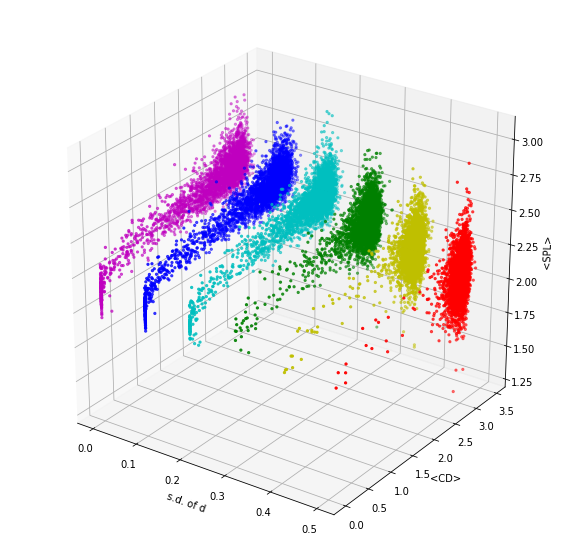

In [7]:
analysis.plotfig(stdd, cd, spl, 'd', 'sayama_base')

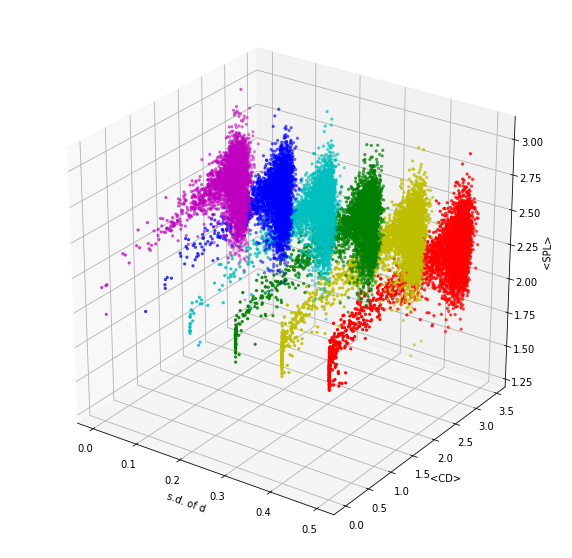

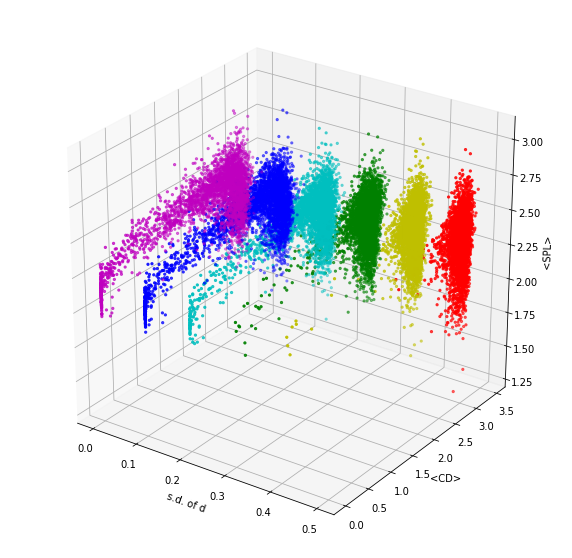

In [8]:
analysis.plotfig(stdrw, cd, spl, 'd')
analysis.plotfig(stdrs, cd, spl, 'd')
